In [664]:
# importing essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [665]:
# Loading the dataset
df=pd.read_csv("Salaries.csv")
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


## Exploring and Cleaning the dataset

In [666]:
# Returns number of rows and columns of the dataset
df.shape

(397, 6)

In [667]:
# Returs an object with all columns as headers
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [668]:
# Returns different datatypes for each columns
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [669]:
# Returns basic information of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [670]:
# Returns basic statistics on numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
yrs.since.phd,397.0,22.314861,12.887003,1.0,12.0,21.0,32.0,56.0
yrs.service,397.0,17.614610,13.006024,0.0,7.0,16.0,27.0,60.0
salary,397.0,113706.458438,30289.038695,57800.0,91000.0,107300.0,134185.0,231545.0


In [671]:
# Returns if there is any null value
df.isnull().any()

rank             False
discipline       False
yrs.since.phd    False
yrs.service      False
sex              False
salary           False
dtype: bool

{'whiskers': [<matplotlib.lines.Line2D at 0x1c0a7fb1e50>,
 'caps': [<matplotlib.lines.Line2D at 0x1c0a7fbf430>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c0a7fb1b80>],
 'medians': [<matplotlib.lines.Line2D at 0x1c0a7fbf940>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c0a7fbfc10>],
 'means': []}

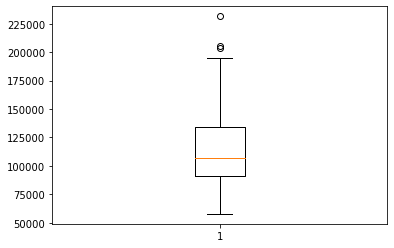

In [672]:
plt.boxplot("salary",data=df)

In [673]:
### We have outliers in the salary data so we should first remove it

In [674]:
df=df[df.salary<200000 ]

{'whiskers': [<matplotlib.lines.Line2D at 0x1c0a801cd90>,
 'caps': [<matplotlib.lines.Line2D at 0x1c0a802a370>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c0a801cac0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c0a802a910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c0a802abe0>],
 'means': []}

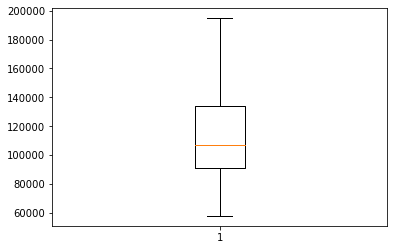

In [675]:
plt.boxplot("salary",data=df)

<AxesSubplot:xlabel='salary', ylabel='Density'>

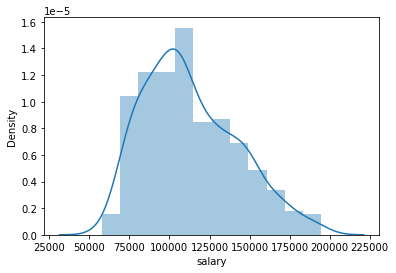

In [676]:
sns.distplot(df.salary)

<AxesSubplot:xlabel='rank', ylabel='salary'>

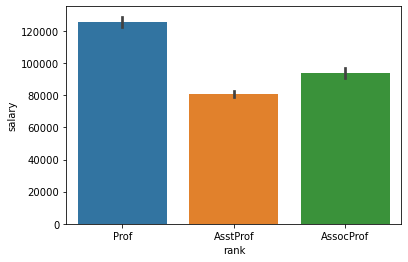

In [677]:
sns.barplot("rank","salary",data=df)

<AxesSubplot:xlabel='sex', ylabel='salary'>

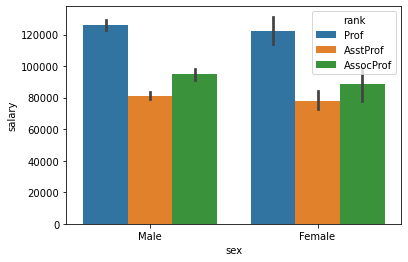

In [678]:
sns.barplot("sex","salary",data=df,hue="rank")

<AxesSubplot:xlabel='discipline', ylabel='salary'>

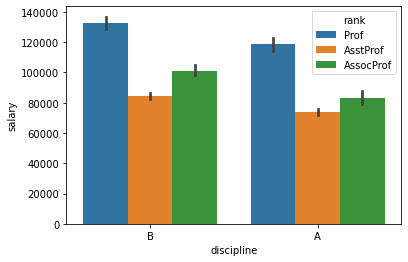

In [679]:
sns.barplot("discipline","salary",data=df,hue="rank")

## EDA

In [680]:
# Lets find any inconsistency in the salary column
df.salary.unique()

array([139750, 173200,  79750, 115000, 141500,  97000, 175000, 147765,
       119250, 129000, 119800,  79800,  77700,  78000, 104800, 117150,
       101000, 103450, 124750, 137000,  89565, 102580,  93904, 113068,
        74830, 106294, 134885,  82379,  77000, 118223, 132261,  79916,
       117256,  80225, 155750,  86373, 125196, 100938, 146500,  93418,
       101299,  94384, 114778,  98193, 151768, 140096,  70768, 126621,
       108875,  74692, 106639, 103760,  83900, 117704,  90215, 100135,
        75044,  90304,  75243, 109785, 103613,  68404, 100522,  99418,
       111512,  91412, 126320, 146856, 100131,  92391, 113398,  73266,
       150480, 193000,  86100,  84240, 150743, 135585, 144640,  88825,
       122960, 132825, 152708,  88400, 172272, 107008,  97032, 105128,
       105631, 166024, 123683,  84000,  95611, 129676, 102235, 106689,
       133217, 126933, 153303, 127512,  83850, 113543,  82099,  82600,
        81500, 131205, 112429,  82100,  72500, 104279, 105000, 120806,
      

there is nothing inconsistent in the data so we can leave it.

In [681]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [682]:
## checking correlation between features of dataset
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.910941,0.410775
yrs.service,0.910941,1.000000,0.327271
salary,0.410775,0.327271,1.000000


<AxesSubplot:>

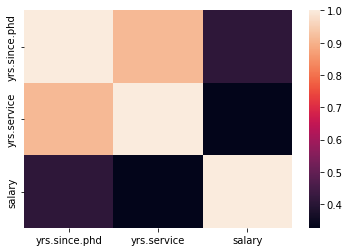

In [683]:
sns.heatmap(df.corr())

#### Since there is very high correlation in between yrs.since.phd and yrs.service 
#### So we should drop one column 
#### lets drop yrs.since.phd

In [684]:
df.drop("yrs.since.phd",axis=1).head()

,rank,discipline,yrs.service,sex,salary
0,Prof,B,18,Male,139750
1,Prof,B,16,Male,173200
2,AsstProf,B,3,Male,79750
3,Prof,B,39,Male,115000
4,Prof,B,41,Male,141500


In [685]:
df["rank"].value_counts()

Prof         263
AsstProf      67
AssocProf     64
Name: rank, dtype: int64

In [686]:
df["discipline"].value_counts()

B    215
A    179
Name: discipline, dtype: int64

In [687]:
df["sex"].value_counts()

Male      355
Female     39
Name: sex, dtype: int64

In [688]:
## Getting Dummies for Catogorical Features (Nominal Features)
df=pd.get_dummies(columns=["discipline","sex"],data=df,drop_first=True)
df.head()

,rank,yrs.since.phd,yrs.service,salary,discipline_B,sex_Male
0,Prof,19,18,139750,1,1
1,Prof,20,16,173200,1,1
2,AsstProf,4,3,79750,1,1
3,Prof,45,39,115000,1,1
4,Prof,40,41,141500,1,1


<AxesSubplot:xlabel='rank', ylabel='salary'>

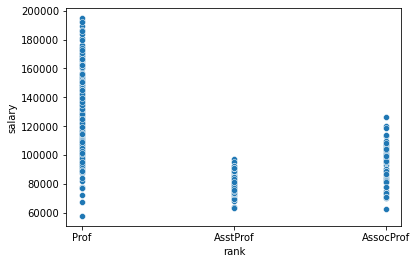

In [689]:
sns.scatterplot("rank","salary",data=df)

In [690]:
## Now Ordinal Encoding for Catogorical Features (Ordinal Features)
import category_encoders as ce
import pandas as pd
encoder= ce.OrdinalEncoder(cols=['rank'],return_df=True,
                           mapping=[{'col':'rank',
'mapping':{'None':0,'AsstProf':1,'AssocProf':2,'Prof':3}}])
df['rank'] = encoder.fit_transform(df['rank'])
print(df)

     rank  yrs.since.phd  yrs.service  salary  discipline_B  sex_Male
0       3             19           18  139750             1         1
1       3             20           16  173200             1         1
2       1              4            3   79750             1         1
3       3             45           39  115000             1         1
4       3             40           41  141500             1         1
..    ...            ...          ...     ...           ...       ...
392     3             33           30  103106             0         1
393     3             31           19  150564             0         1
394     3             42           25  101738             0         1
395     3             25           15   95329             0         1
396     1              8            4   81035             0         1

[394 rows x 6 columns]


In [691]:
# seperating indepandent and dependent features
X=df.drop("salary",axis=1)
y=df["salary"]

In [692]:
## Creating train test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [693]:
# Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [694]:
X_train=scaler.fit_transform(X_train)
X_train

array([[ 0.6299507 ,  1.26807788,  1.31368735, -1.11165298,  0.34992711],
       [ 0.6299507 ,  0.21527286,  0.27488348,  0.8995613 ,  0.34992711],
       [-0.71296746, -0.75654716, -0.76392038, -1.11165298, -2.85773803],
       ...,
       [-2.05588563, -1.48541217, -1.32327631, -1.11165298,  0.34992711],
       [ 0.6299507 ,  2.7258079 ,  2.5123072 ,  0.8995613 ,  0.34992711],
       [ 0.6299507 , -0.18965215, -0.28447244,  0.8995613 , -2.85773803]])

In [695]:
X_test=scaler.transform(X_test)
X_test

array([[-2.05588563, -1.32344217, -1.24336832,  0.8995613 ,  0.34992711],
       [ 0.6299507 ,  0.70118287,  0.75433142, -1.11165298,  0.34992711],
       [ 0.6299507 ,  0.45822786,  0.43469946, -1.11165298,  0.34992711],
       [ 0.6299507 ,  0.05330286,  0.27488348,  0.8995613 ,  0.34992711],
       [ 0.6299507 ,  0.86315287,  0.99405539, -1.11165298,  0.34992711],
       [ 0.6299507 , -0.27063715, -1.00364435,  0.8995613 ,  0.34992711],
       [ 0.6299507 ,  1.43004788,  0.75433142,  0.8995613 ,  0.34992711],
       [-2.05588563, -1.16147216, -1.16346033, -1.11165298,  0.34992711],
       [-2.05588563, -1.48541217, -1.08355234,  0.8995613 ,  0.34992711],
       [ 0.6299507 ,  1.34906288,  1.47350333, -1.11165298,  0.34992711],
       [ 0.6299507 , -0.35162215,  0.03515952,  0.8995613 , -2.85773803],
       [ 0.6299507 , -0.18965215,  0.19497549,  0.8995613 ,  0.34992711],
       [ 0.6299507 ,  1.59201788,  1.79313529, -1.11165298,  0.34992711],
       [ 0.6299507 , -0.51359215, -0.1

## Model fitting

In [696]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [697]:
# Prediction on test data
y_pred=lr.predict(X_test)

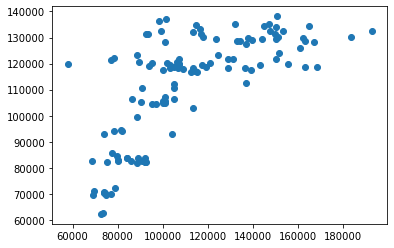

In [698]:
plt.scatter(y_test,y_pred)

In [699]:
## prediction 
residuals=y_test-y_pred
residuals

79       323.505634
277    44687.877646
248    10324.412514
56    -12339.044673
392   -15296.921426
           ...     
282   -62024.148204
356   -34429.729308
251   -18114.408764
154     8374.977228
110    -4480.028589
Name: salary, Length: 119, dtype: float64

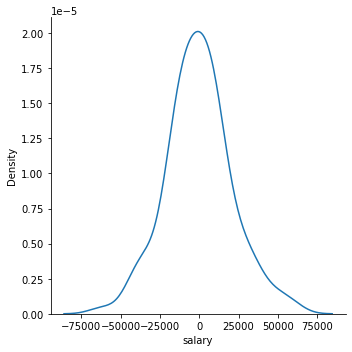

In [700]:
sns.displot(residuals,kind="kde")

In [701]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mean_squared_error(y_test,y_pred)

433048216.20003027

## Results:

In [715]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error is : ",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error is : ", np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 Score is : ",r2_score(y_test,y_pred))
print(round(r2_score(y_test,y_pred)*100,2),"%")



Mean Absolute Error :  15856.652161897213
Mean Squared Error is :  433048216.20003027
Root Mean Squared Error is :  20809.81057578445
R2 Score is :  0.49331400219406796
49.33 %
